# COMP0195: Accountable, Transparent, and Responsible Artificial Intelligence (24/25) - Lab 2

#### In the lab we will be workng with the UCI Adult Dataset. (https://archive.ics.uci.edu/ml/datasets/adult).

In [34]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif

In [35]:
#install dataset
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
data_df = fetch_ucirepo(id=2)
income_df = data_df['data']['targets']
features_df = data_df['data']['features']
df = pd.concat([features_df, income_df], axis=1, ignore_index=False).dropna()
display(df)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Data Analysis

#### We will first do some data analysis to get a better understadning of the distribution of sensitive variables like race and gender that can make the dataset biased

Text(0.5, 1.0, 'Race')

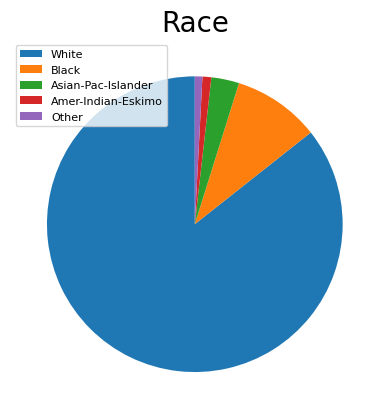

In [36]:
#TASK 1
#Get the popluation count by race

################

counts = df['race'].value_counts()

################

labels = counts.index

#Plot pie chart
plt.pie(counts, startangle=90)
plt.legend(labels, loc=2,fontsize=8)
plt.title("Race",size=20)

Text(0.5, 1.0, 'Sex')

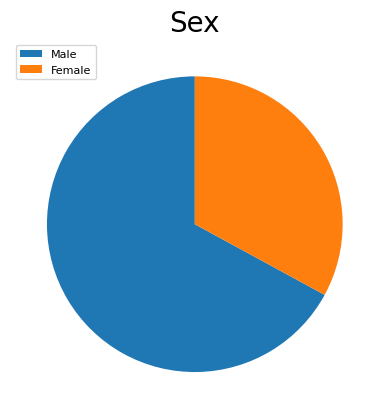

In [37]:
#TASK 2

#Get the popluation count by Sex

################

counts = df['sex'].value_counts()

################

labels = counts.index

#Plot pie chart
plt.pie(counts, startangle=90)
plt.legend(labels, loc=2,fontsize=8)
plt.title("Sex",size=20)

#### Defining protected features


##### Before we move on, we will need to define our protected features. We do this by creating binary variables using the sensitive attributes. We define the variable so that 1 represents a privileged group and 0 represents an unprivileged group.

In [38]:
# We define these features using the code below. For race, we define
# the protected feature so that “White” is the privileged group.
# That is the variable has a value of 1 if the person is white and
# 0 otherwise. For sex, “Male” is the privileged group.

df_fair = df[['race','sex']]

#Define protected features
df_fair['priv_race'] = [1 if r=='White' else 0 for r in df_fair['race']]
df_fair['priv_sex'] = [1 if s=='Male' else 0 for s in df_fair['sex']]

#Define target variable
df_fair['income'] =  [1 if income == '>50K'else 0 for income in df['income']]
display(df_fair)

,race,sex,priv_race,priv_sex,income
0,White,Male,1,1,0
1,White,Male,1,1,0
2,White,Male,1,1,0
3,Black,Male,0,1,0
4,Black,Female,0,0,0
...,...,...,...,...,...
48836,White,Male,1,1,0
48837,White,Female,1,0,0
48839,White,Male,1,1,0
48840,Asian-Pac-Islander,Male,0,1,0


## Bias and Prevalence

#### For a target variable, prevalence is the proportion of the positive cases to overall cases. Where a positive case is when the target variable has a value of 1. Our dataset has an overall prevalence of 24.8%. That is roughly 1/4 of the people in our dataset earn above $50K. We can also use prevalence as an indicator of bias in our dataset. Ideally, in datasets with no bias, prevalence of all features, irrespective of their values should be the same.

In [39]:
# TASK 3

#Calculate the prevelance
#Look into the groupby operation for pandas

####
#Calculate the prevelance of target variable of income
prev = df_fair['income'].mean()
print(prev)

####
#Calculate the prevelance of priv_race with respect to income
prev_race = df_fair.groupby('priv_race')['income'].mean()
print(prev_race)

####
#Calculate the prevelance of priv_Sex with respect to income
prev_sex = df_fair.groupby('priv_sex')['income'].mean()
print(prev_sex)

####
#Calculate the combined prevelance of priv_race and priv_sex with respect to income
prev_comb = df_fair.groupby(['priv_race','priv_sex'])['income'].mean()
print(prev_comb)




0.1646542491757838
priv_race
0    0.105925
1    0.174496
Name: income, dtype: float64
priv_sex
0    0.075172
1    0.208598
Name: income, dtype: float64
priv_race  priv_sex
0          0           0.049443
           1           0.151547
1          0           0.081394
           1           0.216259
Name: income, dtype: float64


#### Question: What do you notice about the difference in prevelence between privileged and underpriveleged race and sex?

#### Question: What is the difference in prevelence between an indivdual belonging to an under-privileged race and sex (both) and someone belonging to a privileged race and sex (both)?

#### At this point, you should be asking yourself why we have these large differences in prevalence. The dataset was built using United States census data from 1994. The country has a history of discrimination based on gender and race. Ultimately, the target variable reflects this discrimination. In this sense, prevalence can be used to understand the extent to which historical injustice is embedded in our target variable.

In [40]:
#Target variable
y = [1 if y == '>50K' else 0 for y in df['income']]

#Model features
X = df[['age','education-num','hours-per-week']]
X['marital-status'] = [1 if x=='Married-civ-spouse' else 0 for x in df['marital-status']]
X['native-country'] = [1 if x=='United-States' else 0 for x in df['native-country']]

occ_groups = {
    'Priv-house-serv':0,'Other-service':0,'Handlers-cleaners':0,
    'Farming-fishing':1,'Machine-op-inspct':1,'Adm-clerical':1,
    'Transport-moving':2,'Craft-repair':2,'Sales':2, '?': -1,
    'Armed-Forces':3,'Tech-support':3,'Protective-serv':3,
    'Prof-specialty':4,'Exec-managerial':4}

X['occupation'] = [occ_groups[x] for x in df['occupation']]

X.head()

,age,education-num,hours-per-week,marital-status,native-country,occupation
0,39,13,40,0,1,1
1,50,13,13,1,1,4
2,38,9,40,0,1,0
3,53,7,40,1,1,0
4,28,13,40,1,0,4


In [41]:

#TASK 4
#Training a a Randomforest Classifier

model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X, y)

#Get predictions
y_pred = model.predict(X)
df_fair['income_pred'] = y_pred



In [42]:

def fairness_metrics(df):
    """Calculate fairness for subgroup of population"""

# TASK 5
# Make a Confusion Matrix of real values and target values
    cm=confusion_matrix(df['income'],df['income_pred'])
    TN, FP, FN, TP = cm.ravel()

    N = TP+FP+FN+TN #Total population
    ACC = (TP+TN)/N #Accuracy

    return np.array([ACC])

In [43]:


#TASK 6
#Calculate the fairness metrics for privileged and under-privileed group in race
fm_race_1 = fairness_metrics(df_fair[df_fair.priv_race==1])
fm_race_0 = fairness_metrics(df_fair[df_fair.priv_race==0])

#Get ratio of fairness metrics
fm_race = fm_race_0/fm_race_1

print(fm_race_0)
print(fm_race_1)

[0.89407462]
[0.82550385]


In [44]:
#TASK 7

#Calculate the fairness metrics for privileged and under-privileed group in sex
fm_sex_1 = fairness_metrics(df_fair[df_fair.priv_sex==1])
fm_sex_0 = fairness_metrics(df_fair[df_fair.priv_sex==0])

print(fm_sex_0)
print(fm_sex_1)

[0.92482785]
[0.79140182]


#### Question: Do you notice any differences in accuracy between the privileged and under-privileged race and gender in the Random Forest algorithm? What kind of bias do you think this would this be from the (Baker and Hawn, 2021), and why?

##### Baker and Hawn (2021): https://edarxiv.org/pbmvz/

In [45]:
#TASK 8
#Training a Support Vector Machine Model

model1 = svm.SVC()
model1.fit(X, y)

#Get predictions
y_pred_svm = model1.predict(X)
df_fair['income_pred_svm'] = y_pred_svm

In [46]:
def fairness_metrics_2(df):
    """Calculate fairness for subgroup of population"""

# Make a Confusion Matrix of real values and target values
    cm=confusion_matrix(df['income'],df['income_pred_svm'])
    TN, FP, FN, TP = cm.ravel()

    N = TP+FP+FN+TN #Total population
    ACC = (TP+TN)/N #Accuracy

    return np.array([ACC])

In [47]:
#TASK 9
#Calculate the fairness metrics for privileged and under-privileed group in race
fm_race_1_svm = fairness_metrics_2(df_fair[df_fair.priv_race==1])
fm_race_0_svm = fairness_metrics_2(df_fair[df_fair.priv_race==0])

#Get ratio of fairness metrics
fm_race_svm = fm_race_0_svm/fm_race_1_svm

print(fm_race_0_svm)
print(fm_race_1_svm)

[0.89407462]
[0.82550385]


In [48]:
#TASK 10
#Calculate the fairness metrics for privileged and under-privileed group in sex
fm_sex_1_svm = fairness_metrics_2(df_fair[df_fair.priv_sex==1])
fm_sex_0_svm = fairness_metrics_2(df_fair[df_fair.priv_sex==0])

#Get ratio of fairness metrics
fm_sex_svm = fm_sex_0_svm/fm_sex_1_svm

print(fm_sex_0_svm)
print(fm_sex_1_svm)

[0.92482785]
[0.79140182]


#### Question: What do you notice as the difference in fairness between SVM and Random Forest Algorithm?